In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 一、数据预处理

In [3]:
df = pd.read_csv('data/data_wuliu.csv', encoding='gbk')
# head() 查看数据特点   
# 销售金额有问题
df.head()

,订单号,订单行,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,10,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,"1052,75元"
1,P096826,10,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
2,NaN,20,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
3,P097435,10,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,"6858,77元"
4,P097446,60,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,"129,58元"


In [4]:
# 查看缺失值， 查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
订单号       1159 non-null object
订单行       1161 non-null int64
销售时间      1161 non-null object
交货时间      1161 non-null object
货品交货状况    1159 non-null object
货品        1161 non-null object
货品用户反馈    1161 non-null object
销售区域      1161 non-null object
数量        1157 non-null float64
销售金额      1161 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 90.8+ KB


In [5]:
df.describe()

,订单行,数量
count,1161.000000,1157.000000
mean,13.178295,76.663354
std,7.093713,588.138241
min,10.000000,1.000000
25%,10.000000,1.000000
50%,10.000000,1.000000
75%,20.000000,4.000000
max,100.000000,11500.000000


In [6]:
# 处理缺失值
df.dropna(inplace=True)
# 处理重复值
# 造成分析数据产生误差
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1160
Data columns (total 10 columns):
订单号       1146 non-null object
订单行       1146 non-null int64
销售时间      1146 non-null object
交货时间      1146 non-null object
货品交货状况    1146 non-null object
货品        1146 non-null object
货品用户反馈    1146 non-null object
销售区域      1146 non-null object
数量        1146 non-null float64
销售金额      1146 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 98.5+ KB


In [7]:
# 处理金额操作   
# 元  去除     万元  去除  *10000     ，去除
def fn(x):
    x = x.replace(',', '.') # 将，去除
    # find 没有找到返回-1
    if x.find('万元') != -1: # -1 没有找到对应元素
        return float(x[:-2]) * 10000
    elif x.find('元') != -1:
        return float(x[:-1])
df['销售金额'] = df['销售金额'].map(fn)
df.head()

,订单号,订单行,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,10,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,1052.75
1,P096826,10,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,115000.00
3,P097435,10,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,6858.77
4,P097446,60,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,129.58
5,P097446,80,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,32.39


In [8]:
# 查看异常值   销售金额不能为零
df.describe()

,订单行,数量,销售金额
count,1146.000000,1146.000000,1146.000000
mean,13.193717,76.069372,1223.488255
std,7.124041,589.416486,11145.993359
min,10.000000,1.000000,0.000000
25%,10.000000,1.000000,29.415000
50%,10.000000,1.000000,94.765000
75%,20.000000,4.000000,357.677500
max,100.000000,11500.000000,327000.000000


In [9]:
# 保留销售金额大于0的数值
df = df[df['销售金额']>0]

## 1.2转化时间

In [10]:
df['时间'] = pd.to_datetime(df['交货时间'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145 entries, 0 to 1160
Data columns (total 11 columns):
订单号       1145 non-null object
订单行       1145 non-null int64
销售时间      1145 non-null object
交货时间      1145 non-null object
货品交货状况    1145 non-null object
货品        1145 non-null object
货品用户反馈    1145 non-null object
销售区域      1145 non-null object
数量        1145 non-null float64
销售金额      1145 non-null float64
时间        1145 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 107.3+ KB


In [11]:
# 删除无用列
df.head()

,订单号,订单行,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,时间
0,P096311,10,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,1052.75,2016-09-30
1,P096826,10,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,115000.00,2016-10-30
3,P097435,10,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,6858.77,2016-09-30
4,P097446,60,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,129.58,2017-01-26
5,P097446,80,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,32.39,2017-01-26


In [12]:
del df['订单号']
del df['销售时间']
del df['交货时间']

# 二、时间金额分析

## 2.1 月份提取

In [13]:
df['月'] = df['时间'].map(lambda x: x.month)
df.head()

,订单行,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,时间,月
0,10,晚交货,货品3,质量合格,华北,2.0,1052.75,2016-09-30,9
1,10,按时交货,货品3,质量合格,华北,10.0,115000.00,2016-10-30,10
3,10,按时交货,货品1,返修,华南,2.0,6858.77,2016-09-30,9
4,60,晚交货,货品3,质量合格,华北,15.0,129.58,2017-01-26,1
5,80,晚交货,货品3,拒货,华北,15.0,32.39,2017-01-26,1


## 2.2计算每个月的销售总值

In [14]:
df.groupby('月').sum()['销售金额']

月
1     103517.57
2     150946.79
3      45562.82
9     366163.48
10    294996.80
11    324293.94
12    116636.14
Name: 销售金额, dtype: float64

## 2.3计算地区销售总值

In [15]:
df.groupby('销售区域').sum()['销售金额']

销售区域
华东      293196.29
华北      634322.75
华南      245527.74
泰国       30365.26
西北      127066.15
马来西亚     71639.35
Name: 销售金额, dtype: float64

## 2.4计算货品销售总值

In [16]:
df.groupby('货品').sum()['销售金额']

货品
货品1    462150.58
货品2    305366.79
货品3    520546.32
货品4     24219.74
货品5     30365.26
货品6     59468.85
Name: 销售金额, dtype: float64

公司9-11月销售高峰时段  
国内高于海外    华北地区最好销售区域  
货品1-3销售总量高

# 三、货品交货状态分析

## 3.1根据月份分析交货状态

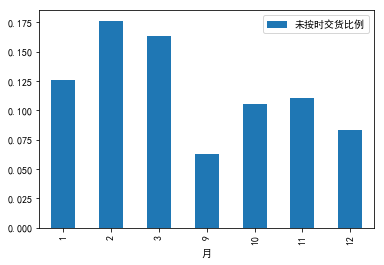

In [17]:
df['货品交货状况'] = df['货品交货状况'].map(lambda x: x.strip()) # 去除文字前后空格
df1 = df.groupby(['月', '货品交货状况']).size().unstack() # 交货状况横向显示 （列）
df1['未按时交货比例'] = df1['晚交货'] / (df1['按时交货'] + df1['晚交货'])
df1.plot(kind='bar', y='未按时交货比例')

## 3.2 货品与交货状况比例关系

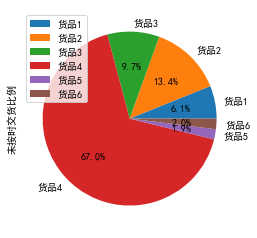

In [18]:
df1 = df.groupby(['货品', '货品交货状况']).size().unstack()
df1['未按时交货比例'] = df1['晚交货'] / (df1['按时交货'] + df1['晚交货'])
df1.plot(kind='pie', y='未按时交货比例', autopct='%1.1f%%')

## 3.3 销售区域与交货状况比例关系

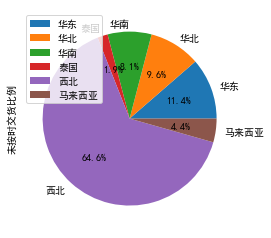

In [19]:
df1 = df.groupby(['销售区域', '货品交货状况']).size().unstack()
df1['未按时交货比例'] = df1['晚交货'] / (df1['按时交货']+df1['晚交货'])
df1.plot(kind='pie', y='未按时交货比例', autopct='%1.1f%%')
plt.legend(loc='upper left')
# 西北业务差，原因在于未按时交货比例高
# 如果提升按时交货比例，是否可以提升营业额

# 四、统计货物量

## 4.1根据不同的月份,货物统计货物量

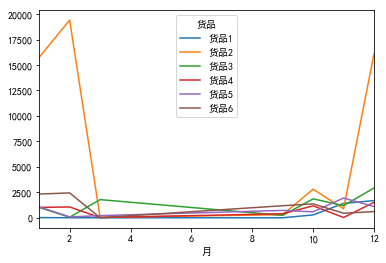

In [31]:
df.groupby(['月','货品']).sum()['数量'].unstack().plot()

## 4.2根据销售区域统计货物量

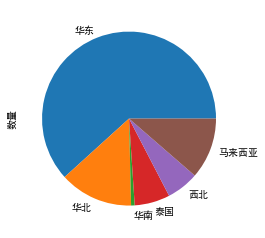

In [33]:
df.groupby('销售区域').sum()['数量'].plot(kind='pie')
# 华东区域运营方式优化
# 二八原则

## 4.3根据不同货物统计货物量

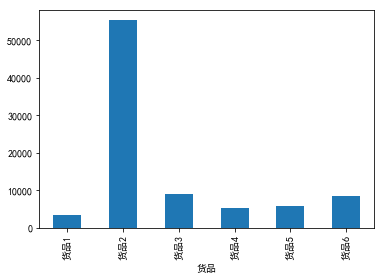

In [34]:
df.groupby('货品').sum()['数量'].plot(kind='bar')

## 4.4 计算不同销售区域货物单价

In [20]:
# 新的列创建货物单价
df['货物单价'] = df['销售金额'] / df['数量']
df.head()

,订单行,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,时间,月,货物单价
0,10,晚交货,货品3,质量合格,华北,2.0,1052.75,2016-09-30,9,526.375000
1,10,按时交货,货品3,质量合格,华北,10.0,115000.00,2016-10-30,10,11500.000000
3,10,按时交货,货品1,返修,华南,2.0,6858.77,2016-09-30,9,3429.385000
4,60,晚交货,货品3,质量合格,华北,15.0,129.58,2017-01-26,1,8.638667
5,80,晚交货,货品3,拒货,华北,15.0,32.39,2017-01-26,1,2.159333


In [25]:
df1 = df.groupby(['销售区域', '货品']).mean().unstack()['货物单价']
df1.fillna(0, inplace=True)# 填充缺失值
df1

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,0.000000,689.681560,0.000000,0.000000,0.000000,0.000
华北,6852.682506,0.000000,1693.753672,0.000000,0.000000,0.000
华南,17821.832086,0.000000,0.000000,0.000000,0.000000,0.000
泰国,0.000000,0.000000,0.000000,0.000000,108.759334,0.000
西北,33208.281852,0.000000,0.000000,262.113821,0.000000,0.000
马来西亚,0.000000,773.216113,0.000000,0.000000,0.000000,124.375


# 五、用户反馈

In [39]:
df1 = df.groupby(['货品', '销售区域'])['货品用户反馈'].value_counts().unstack()
# 不同区域的拒货率， 不同区域返修率
df1.fillna(0, inplace=True)
# 创建所有数据和
df1['总数量'] = df1['拒货'] + df1['质量合格'] + df1['返修']
df1['拒货率'] = df1['拒货'] / df1['总数量']
df1['返修率'] = df1['返修'] / df1['总数量']
df1

货品用户反馈      拒货   质量合格    返修    总数量       拒货率       返修率
货品  销售区域                                              
货品1 华北     0.0    3.0  12.0   15.0  0.000000  0.800000
    华南     5.0    4.0   2.0   11.0  0.454545  0.181818
    西北     0.0    1.0   2.0    3.0  0.000000  0.666667
货品2 华东    72.0  184.0  51.0  307.0  0.234528  0.166124
    马来西亚   6.0    1.0   3.0   10.0  0.600000  0.300000
货品3 华北    31.0  188.0  19.0  238.0  0.130252  0.079832
货品4 西北     0.0    9.0  49.0   58.0  0.000000  0.844828
货品5 泰国    14.0  144.0  29.0  187.0  0.074866  0.155080
货品6 马来西亚  56.0  246.0  14.0  316.0  0.177215  0.044304

In [ ]:
# 降低马来西亚，华南地区拒货率   以及西北返修率